In [37]:
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to the uploaded WhatsApp chat file
file_path = 'WhatsApp Chat with 🚩गणेशनगर सायम शाखा🚩.txt'

def parse_messages(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Split the content into messages using the date and time as separator
    messages = re.split(r'\n(?=\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[AP]M\s-\s)', content)

    # Remove any leading/trailing whitespace from messages
    messages = [msg.strip() for msg in messages if msg.strip()]

    return messages



In [3]:
def format_message(message):
    # Extract the date, time, and content from the message
    match = re.match(r'(\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s*[AP]M)\s-\s(.*)', message, re.DOTALL)
    if match:
        datetime_str, content = match.groups()
        # Replace non-ASCII characters with a standard space
        datetime_str = re.sub(r'[^\x00-\x7F]+', ' ', datetime_str)
        # Try parsing with both 2-digit and 4-digit year formats
        try:
            dt = datetime.strptime(datetime_str, '%m/%d/%y, %I:%M %p')
        except ValueError:
            try:
                dt = datetime.strptime(datetime_str, '%m/%d/%Y, %I:%M %p')
            except ValueError:
                return {'date_time': None, 'author': None, 'message': f"Unable to parse date: {datetime_str}\n{content}"}
        formatted_dt = dt.strftime('%Y-%m-%d %H:%M')
        # Check if it's a system message or a user message
        if ': ' in content:
            author, text = content.split(': ', 1)
            return {'date_time': formatted_dt, 'author': author, 'message': text}
        else:
            return {'date_time': formatted_dt, 'author': 'System', 'message': content}
    return {'date_time': None, 'author': None, 'message': message}




In [98]:
# Parse the chat
distinct_messages = parse_messages(file_path)

# Format messages and collect them in a list
formatted_messages = [format_message(msg) for msg in distinct_messages]

# Create a DataFrame
df = pd.DataFrame(formatted_messages, columns=['date_time', 'author', 'message'])

# Display the DataFrame
df.shape

(1769, 3)

In [100]:
filtered_df = df[df['message'].str.contains('Aaj ki|आज की संख्या', case=False, na=False)]
# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
filtered_df.shape

(251, 3)

In [16]:
 print(df[df['date_time'].str.contains('2024-06-27 19:53', case=False, na=False)]['message']

1742    गणेश नगर स्याम शाखा \nआज की संख्या \nशिशु 4\nबाल 2\nतरुण 2\nकुल 8
Name: message, dtype: object


In [109]:
# Function to extract counts
def extract_counts(message):
    counts = {
        'shishu': 0,
        'bal': 0,
        'tarun': 0,
        'abhayagat': 0,
        'total': 0
    }
    patterns = {
        'shishu': r'शिशु\s*[-\s]*\s*(\d+)|Shishu\s*[-\s]*\s*(\d+)',
        'bal': r'बाल\s*[-\s]*\s*(\d+)|Bal\s*[-\s]*\s*(\d+)',
        'tarun': r'तरुण\s*[-\s]*\s*(\d+)|Tarun\s*[-\s]*\s*(\d+)',
        'abhayagat': r'अभ्यागत\s*[-\s]*\s*(\d+)|Abhyagat\s*[-\s]*\s*(\d+)',
        'total': r'कुल\s*[-\s]*\s*(\d+)|Total\s*[-\s]*\s*(\d+)'
    }
    for key, pattern in patterns.items():
        matches = re.findall(pattern, message)
        for match in matches:
            counts[key] += int(match[0] or match[1])
    return counts

# Apply the function to the 'message' column
filtered_df['counts'] = filtered_df['message'].apply(extract_counts)

# Expand the counts dictionary into separate columns
counts_df = filtered_df['counts'].apply(pd.Series)
counts_df.shape
# # Merge the counts_df with the filtered_df
# result_df = filtered_df[['date_time']].join(counts_df)

# print(result_df)


C:\Users\hp\AppData\Local\Temp\ipykernel_16836\1725699201.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['counts'] = filtered_df['message'].apply(extract_counts)


(251, 5)

In [110]:
counts_df['total'].value_counts().sort_values

<bound method Series.sort_values of total
10    23
13    21
12    21
9     20
14    19
0     17
11    16
8     15
6     12
17    11
7     11
18    11
15     9
4      9
19     9
16     7
2      4
21     4
3      3
5      3
22     3
20     2
24     1
Name: count, dtype: int64>

In [104]:
counts_df[counts_df['total']==0].shape


(37, 5)

In [111]:
# Assuming you have already executed the previous code and have 'filtered_df' and 'counts_df' available

# Filter counts_df for rows where 'total' is 0
zero_total_counts = counts_df[counts_df['total'] == 0]

# Get indices of these rows
zero_total_indices = zero_total_counts.index

# Filter filtered_df based on these indices
zero_total_filtered_df = filtered_df.iloc[zero_total_indices]

print(zero_total_filtered_df)


IndexError: positional indexers are out-of-bounds

In [34]:
final = pd.DataFrame()
final = pd.concat([filtered_df, counts_df], axis=1, join="inner")
final

,date_time,author,message,counts,shishu,bal,tarun,abhayagat,total,shishu,bal,tarun,abhayagat,total
4,2023-05-28 20:06,+91 84213 39076,Aaj ki total sankhya\nShishu - 6\nBal - 4\nTar...,"{'shishu': 6, 'bal': 4, 'tarun': 4, 'abhayagat...",6,4,4,0,14,6,4,4,0,14
6,2023-05-29 19:35,+91 84213 39076,Aaj ki total sankhya\n 9,"{'shishu': 0, 'bal': 0, 'tarun': 0, 'abhayagat...",0,0,0,0,0,0,0,0,0,0
7,2023-05-30 20:22,Hemant Kumar Ganesh Nagar,Aaj ki total sankhya\n 16,"{'shishu': 0, 'bal': 0, 'tarun': 0, 'abhayagat...",0,0,0,0,0,0,0,0,0,0
71,2023-06-13 19:53,Darshan Ji Mehta,Aaj ki sankhya \nShishu 3\nBal 4\nTarun 5\n...,"{'shishu': 3, 'bal': 4, 'tarun': 5, 'abhayagat...",3,4,5,0,12,3,4,5,0,12
77,2023-06-14 19:17,Darshan Ji Mehta,Aaj ki sankhya \nShishu 3\nBal 3\nTarun 3\n...,"{'shishu': 3, 'bal': 3, 'tarun': 3, 'abhayagat...",3,3,3,0,9,3,3,3,0,9
81,2023-06-15 19:20,Darshan Ji Mehta,Aaj ki sankhya \nShishu 3\nBal 3\nTarun 2\n...,"{'shishu': 3, 'bal': 3, 'tarun': 2, 'abhayagat...",3,3,2,0,8,3,3,2,0,8
83,2023-06-16 19:10,Darshan Ji Mehta,Aaj ki sankhya \nShishu 3\nBal 5\nTarun 5\n...,"{'shishu': 3, 'bal': 5, 'tarun': 5, 'abhayagat...",3,5,5,0,13,3,5,5,0,13
85,2023-06-17 19:36,Darshan Ji Mehta,Aaj ki sankhya \nShishu 3\nBal 3\nTarun 5\nT...,"{'shishu': 3, 'bal': 3, 'tarun': 5, 'abhayagat...",3,3,5,0,11,3,3,5,0,11
86,2023-06-18 19:16,Darshan Ji Mehta,Aaj ki sankhya \nShishu 5\nBal 5\nTarun 6\nT...,"{'shishu': 5, 'bal': 5, 'tarun': 6, 'abhayagat...",5,5,6,0,16,5,5,6,0,16
92,2023-06-19 19:07,Darshan Ji Mehta,Aaj ki sankhya \nShishu 3\nBal 6\nTarun 5\nT...,"{'shishu': 3, 'bal': 6, 'tarun': 5, 'abhayagat...",3,6,5,0,14,3,6,5,0,14


In [36]:
final.columns


Index(['date_time', 'author', 'message', 'counts', 'shishu', 'bal', 'tarun',
       'abhayagat', 'total', 'shishu', 'bal', 'tarun', 'abhayagat', 'total'],
      dtype='object')

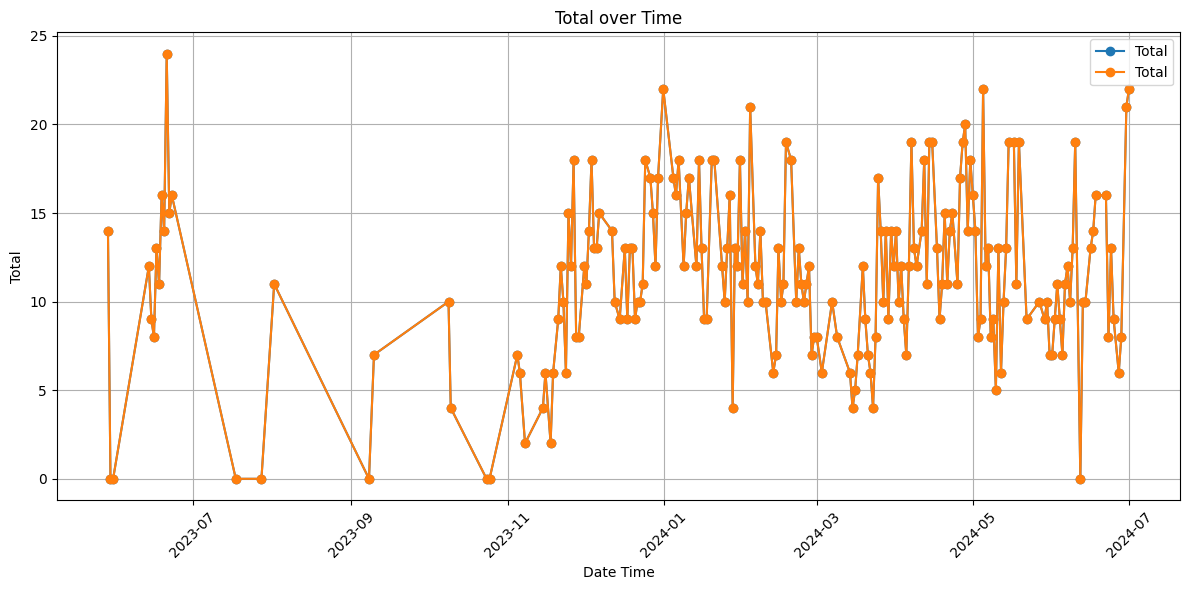

In [39]:
final['date_time'] = pd.to_datetime(final['date_time'])

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot the total column
plt.plot(final['date_time'], final['total'], label='Total', marker='o')

plt.xlabel('Date Time')
plt.ylabel('Total')
plt.title('Total over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()